# Multi-Layer Perceptron (MLP)

## Theory
A Multi-Layer Perceptron (MLP) is a feed-forward artificial neural network.
It consists of an input layer, one or more hidden layers, and an output layer.

- Each neuron computes a weighted sum of inputs, applies an activation function, and passes the result forward.
- MLPs learn parameters (weights and biases) using **backpropagation** and **gradient descent**.
- Unlike linear models, MLPs can capture **non-linear decision boundaries**.




In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)
mlp.fit(X_train, y_train)

C:\Users\GARV BEHL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [4]:
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



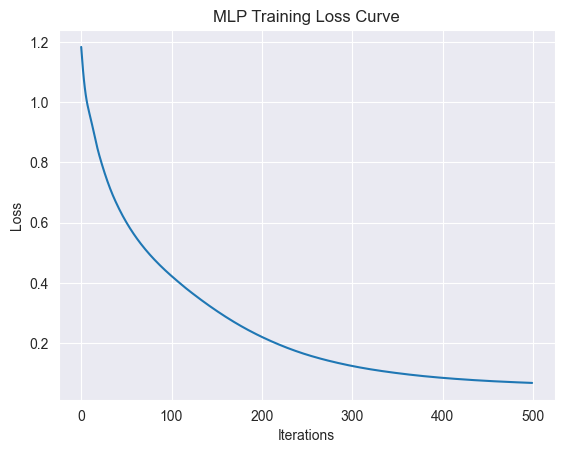

In [5]:
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.title("MLP Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

C:\Users\GARV BEHL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GARV BEHL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


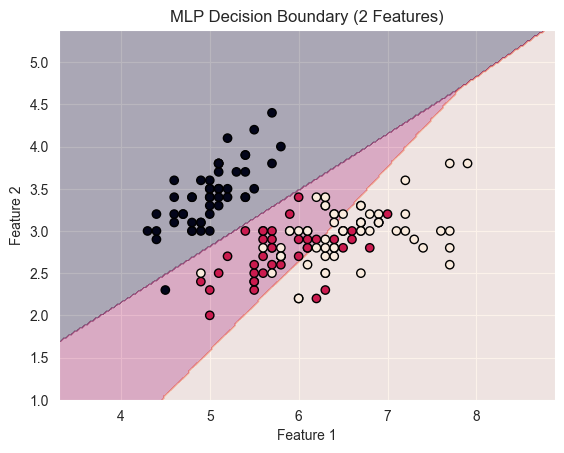

In [6]:
import numpy as np
X_2d = X.iloc[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_2d, y, test_size=0.2, random_state=42
)
mlp2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp2.fit(X_train2, y_train2)
x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = mlp2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y, edgecolor="k")
plt.title("MLP Decision Boundary (2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()